# I Can Code That! 
## Ranked Choice Voting Simulation
- Glitched Failure Video - https://youtu.be/XASB6JjClBk
- Great video on this! "Simulating alternate voting systems" - https://www.youtube.com/watch?v=yhO6jfHPFQU
- But first, let's describe the most common voting system, Plurality Voting.

## How does Plurality Voting Work?
- The candidate with the most votes wins
- Voters select the one candidate they want more than the rest

### What we'll need to simulate this:
- Generate Candidates with multiple dimension/"topic beliefs"
- Generate Voters with multiple dimension/"topic beliefs"
- Determine a way to match each voter to the candidate that is most similiar to the voter
- Simulate the Plurality Voting Algorithm

### Generate person
- Random name
- Random dimension values

In [40]:
import numpy as np
np.random.seed(12345) # set seed for reproducibility

We can use the `numpy` package to quickly generate a tables of random numbers (between 0-1)  

Each row will represent as an individual person, and each column represents a dimension (or topic of interest)

In [41]:
np.random.random([2,3])

array([[0.92961609, 0.31637555, 0.18391881],
       [0.20456028, 0.56772503, 0.5955447 ]])

I'll use the `pandas` library for easy table storage and data manipulation.

In [42]:
import pandas as pd

Let's generate 5 random people with 3 dimensions/topics, and put them in a table

In [43]:
five_people = np.random.random([5,3])
five_people

array([[0.96451452, 0.6531771 , 0.74890664],
       [0.65356987, 0.74771481, 0.96130674],
       [0.0083883 , 0.10644438, 0.29870371],
       [0.65641118, 0.80981255, 0.87217591],
       [0.9646476 , 0.72368535, 0.64247533]])

In [44]:
people = pd.DataFrame(five_people)
people

,0,1,2
0,0.964515,0.653177,0.748907
1,0.653570,0.747715,0.961307
2,0.008388,0.106444,0.298704
3,0.656411,0.809813,0.872176
4,0.964648,0.723685,0.642475


This doesn't look like much of a person, but let's try giving them names.

First, let's define a simple function to generate a random name

In [45]:
CONSONANTS = list('bcdfghjklmnpqrstvwxyz')
VOWELS = list('aeiou')
def random_name(i = 0):
    if i > 3: # base case
        return ''
    consonant = np.random.choice(CONSONANTS)
    vowel = np.random.choice(VOWELS)
    if np.random.random() < .35:
        return consonant + vowel
    return consonant + vowel + random_name(i + 1)

In [46]:
random_name()

'bohowoya'

Now, let's give a name to each person in our table

In [47]:
people

,0,1,2
0,0.964515,0.653177,0.748907
1,0.653570,0.747715,0.961307
2,0.008388,0.106444,0.298704
3,0.656411,0.809813,0.872176
4,0.964648,0.723685,0.642475


In [48]:
people.index = [random_name() for _ in range(people.shape[0])]
people

,0,1,2
qosojahi,0.964515,0.653177,0.748907
qa,0.653570,0.747715,0.961307
xisikebi,0.008388,0.106444,0.298704
si,0.656411,0.809813,0.872176
faji,0.964648,0.723685,0.642475


Now, what about the dimensions? The columns are just going to represent how aligned each person is to a topic.

For example:
- The first column could be how much the person loves cats (as a percentage %)
- The second column could be if the person wants lower taxes (0 or 'no' and 1 for 'yes')
- The third column could be the person's income

Let's rename the columns accordingly.

In [49]:
column_names = ["love_of_cats_%","lower_taxes", "income"]
people.columns = column_names
people

,love_of_cats_%,lower_taxes,income
qosojahi,0.964515,0.653177,0.748907
qa,0.653570,0.747715,0.961307
xisikebi,0.008388,0.106444,0.298704
si,0.656411,0.809813,0.872176
faji,0.964648,0.723685,0.642475


The `lower_taxes` column is a binary dimension and should be a 0 or 1. Let's quickly convert it by converting all values below `.5` to `0` and the rest to `1`.

In [50]:
people['lower_taxes'].map(lambda val: 0 if val < .5 else 1)

qosojahi    1
qa          1
xisikebi    0
si          1
faji        1
Name: lower_taxes, dtype: int64

In [51]:
new_lower_taxes = people['lower_taxes'].map(lambda val: 0 if val < .5 else 1)
people['lower_taxes'] = new_lower_taxes
people

,love_of_cats_%,lower_taxes,income
qosojahi,0.964515,1,0.748907
qa,0.653570,1,0.961307
xisikebi,0.008388,0,0.298704
si,0.656411,1,0.872176
faji,0.964648,1,0.642475


The `income` column looks odd, so let's adjust the numbers to look more like $

_NOTE: the original distribution of random numbers follows a Normal Distribution, however, income tends to be much more skewed, so I'll be using a skewed Gamma Distribution_

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

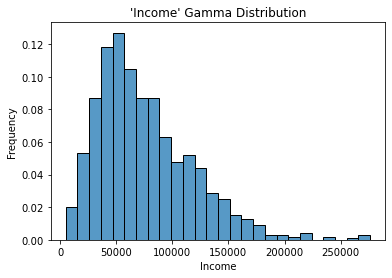

In [53]:
# visualizing my "Income" Gamma Distribution
income_vals = [int(val * 25_000) for val in np.random.gamma(3,1, size = 1_000)]

plt.title("'Income' Gamma Distribution")
plt.xlabel("Income")
plt.ylabel("Frequency")
sns.histplot(income_vals, stat = 'probability');

In [54]:
new_income = [int(val * 25_000) for val in np.random.gamma(3,1, size = people.shape[0])]
people['income'] = new_income
people

,love_of_cats_%,lower_taxes,income
qosojahi,0.964515,1,92725
qa,0.653570,1,145762
xisikebi,0.008388,0,110589
si,0.656411,1,62004
faji,0.964648,1,87388


### Putting it all together
Let's create a helper function that does all of these conversions at once called `create_people`.

- The `create_people` function will take a single integer argument for how many people to create.
- It will return a pandas table with all of the rows and columns formatted the way we just did.

In [55]:
def create_people(n):
    COLUMN_NAMES = ["love_of_cats_%", "lower_taxes", "income"]
    # creating table with random values
    people_table = pd.DataFrame(np.random.random([n,3]))
    
    # adding random names
    people_table.index = [random_name() for _ in range(people_table.shape[0])]
    
    # formatting columns
    people_table.columns = COLUMN_NAMES
    people_table['lower_taxes'] = people_table['lower_taxes'].map(lambda val: 0 if val < .5 else 1)
    people_table['income'] = \
        [int(val * 25_000) for val in np.random.gamma(3,1, size = people_table.shape[0])]
    
    return people_table

In [56]:
create_people(10)

,love_of_cats_%,lower_taxes,income
kuma,0.673205,1,29395
joca,0.115123,1,29048
yo,0.457139,0,40829
dabu,0.124405,1,83268
puze,0.998133,0,121054
deyi,0.684923,1,100554
miheyosi,0.671964,1,58442
fatarumi,0.943534,0,38743
ka,0.775577,1,41084
sada,0.324925,0,39199


Now, let's create 5 candidates and 100 voters using the `create_people` function

In [57]:
candidates = create_people(5)
voters = create_people(100)

In [58]:
candidates

,love_of_cats_%,lower_taxes,income
haxuju,0.619774,0,137765
simugole,0.055576,1,57183
hu,0.907827,0,91733
walohido,0.226756,0,113542
va,0.499962,1,144378


In [59]:
voters.head()

,love_of_cats_%,lower_taxes,income
qemalimo,0.325836,1,24321
dulo,0.180919,1,77679
rozelene,0.955937,0,52842
coximo,0.607083,1,55803
zikiti,0.971877,0,57286


### How can we determine how similar one person is to another?
We'll need to match each voter with the candidate that is __most closely__ related to the voter. There are a number of strategies for this, but two basic methods are:
1. Pairwise distances
2. Cosine Similarity

These two methods are related and I highly recommend digging deeper into how these work on your own. For now, I'll go with pairwise distances since `sklearn` has an out-of-the-box implementation that'll work just fine for our purposes.

In [60]:
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler

Our data must be all numbers (in order to do the needed math!). If we had categorical data, then there are strategies for handling this kind of data, but that is beyond the scope of this project.

The data are all on completely different scales and in order to properly compare distances, we'll want to normalize the numbers (like turning a range of `100-9999` to between `0-1`). We can use the `MinMaxScalar` from `sklearn`.

In [61]:
scaler_obj = MinMaxScaler()

# NOTE: we fit the scaling object here
scaler_obj.fit(candidates)

# NOTE: we transform the data here
norm_candidates = scaler_obj.transform(candidates)

In [62]:
candidates

,love_of_cats_%,lower_taxes,income
haxuju,0.619774,0,137765
simugole,0.055576,1,57183
hu,0.907827,0,91733
walohido,0.226756,0,113542
va,0.499962,1,144378


In [63]:
norm_candidates

array([[0.66200916, 0.        , 0.9241585 ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.39623832],
       [0.20085547, 0.        , 0.64635587],
       [0.52142532, 1.        , 1.        ]])

Now, let's look at the pairwise distances of the candidates (relative to each other)

In [64]:
pairwise_distances(norm_candidates)

array([[0.        , 1.51404262, 0.62684729, 0.53836514, 1.01267752],
       [1.51404262, 0.        , 1.46867451, 1.20752591, 1.12777851],
       [0.62684729, 1.46867451, 0.        , 0.83737135, 1.26236361],
       [0.53836514, 1.20752591, 0.83737135, 0.        , 1.10807455],
       [1.01267752, 1.12777851, 1.26236361, 1.10807455, 0.        ]])

What do these numbers mean? Let's put them into a table to better visualize.

In [65]:
cand_df = pd.DataFrame(pairwise_distances(norm_candidates))
cand_df.columns = candidates.index
cand_df.index = candidates.index
cand_df

,haxuju,simugole,hu,walohido,va
haxuju,0.000000,1.514043,0.626847,0.538365,1.012678
simugole,1.514043,0.000000,1.468675,1.207526,1.127779
hu,0.626847,1.468675,0.000000,0.837371,1.262364
walohido,0.538365,1.207526,0.837371,0.000000,1.108075
va,1.012678,1.127779,1.262364,1.108075,0.000000


We're seeing how distant each candidate is to each other candidate.

#### INTERPRETATION
For example, the first person has `0` distance with themself...which makes sense! The closest possible distance is `0` meaning the values in each dimension is the same.


Let's bring in the voters now and see how close the candidates are for each of them.

__Remember: we'll need to normalize/scale our voter data using the same scaler object we "fitted" earlier.__

In [66]:
# NOTE: we transform the data here using the same (fitted) scaler object from before 
norm_voters = scaler_obj.transform(voters)

In [67]:
norm_voters[:10]

array([[ 3.17112738e-01,  1.00000000e+00, -3.76879408e-01],
       [ 1.47072912e-01,  1.00000000e+00,  2.35059350e-01],
       [ 1.05644970e+00,  0.00000000e+00, -4.97849647e-02],
       [ 6.47117467e-01,  1.00000000e+00, -1.58265956e-02],
       [ 1.07515424e+00,  0.00000000e+00,  1.18126039e-03],
       [ 6.82079019e-01,  0.00000000e+00, -1.23745628e-02],
       [ 7.25582542e-01,  1.00000000e+00, -1.10820575e-01],
       [-4.74944684e-02,  0.00000000e+00,  2.22340731e-01],
       [ 1.01779187e+00,  0.00000000e+00,  1.20052755e-01],
       [ 1.08763900e+00,  1.00000000e+00,  1.55651127e+00]])

The `pairwise_distances` function can take two matrices/tables and calculates the distances as you might expect.

In [68]:
voter_cand_distances = pairwise_distances(norm_voters, norm_candidates)
voter_cand_distances

array([[1.67679849, 0.49254297, 1.43667882, 1.4354533 , 1.39195565],
       [1.31909703, 0.27727845, 1.324184  , 1.08261599, 0.85163016],
       [1.05078504, 1.45552895, 0.44958129, 1.1030202 , 1.54541243],
       [1.37251366, 0.64731097, 1.13768342, 1.27970129, 1.02357325],
       [1.01122492, 1.4683181 , 0.40214206, 1.08657656, 1.51797714],
       [0.93674808, 1.21053084, 0.51772409, 0.81578299, 1.43203068],
       [1.44056352, 0.73399675, 1.15430224, 1.35965241, 1.12942575],
       [0.99796973, 1.02551993, 1.06183098, 0.49139244, 1.38867695],
       [0.87929937, 1.43189139, 0.27675804, 0.97179218, 1.42150867],
       [1.25739047, 1.89886438, 1.53424702, 1.61702439, 0.79391607],
       [1.56143409, 0.90979181, 1.20083783, 1.50550796, 1.30459146],
       [1.32038644, 0.27915754, 1.33686808, 1.07849404, 0.84867202],
       [1.10303422, 0.82644912, 1.04972587, 1.12754281, 0.56545906],
       [0.16796022, 1.4957749 , 0.77137517, 0.46043146, 1.00014908],
       [1.51385641, 1.05918332, 1.

So, what are we looking at now? Let's put it into table form and make sense of it.

In [69]:
voter_cand_df = pd.DataFrame(voter_cand_distances)
voter_cand_df.columns = candidates.index
voter_cand_df.index = voters.index
voter_cand_df.head(5) # just look at top 5

,haxuju,simugole,hu,walohido,va
qemalimo,1.676798,0.492543,1.436679,1.435453,1.391956
dulo,1.319097,0.277278,1.324184,1.082616,0.851630
rozelene,1.050785,1.455529,0.449581,1.103020,1.545412
coximo,1.372514,0.647311,1.137683,1.279701,1.023573
zikiti,1.011225,1.468318,0.402142,1.086577,1.517977



We're basically done! Now all we have to do is grab the "votes". Each voter's lowest pairwise distance candidate is the one their voting for.

There's a useful `sklearn` function for this called `pairwise_distances_argmin_min`. Basically, we just plug in the same normalized values we did with `pairwise_distances`, except now we'll get the column index associated with the minimum value for each row/voter (along with the literal value).

In [70]:
from sklearn.metrics import pairwise_distances_argmin_min

In [71]:
votes_by_cand_index = pairwise_distances_argmin_min(norm_voters, norm_candidates)
votes_by_cand_index[0]

array([1, 1, 2, 1, 2, 2, 1, 3, 2, 4, 1, 1, 4, 0, 1, 1, 3, 1, 2, 2, 1, 4,
       0, 3, 1, 2, 4, 1, 1, 2, 1, 4, 3, 2, 1, 4, 4, 1, 2, 2, 3, 1, 1, 1,
       1, 2, 1, 1, 1, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 0, 1, 1, 1, 3, 3, 4,
       4, 2, 2, 2, 1, 1, 0, 0, 0, 2, 2, 3, 4, 1, 2, 4, 1, 1, 2, 2, 2, 2,
       0, 1, 2, 1, 1, 4, 1, 4, 1, 2, 3, 1], dtype=int64)

If we want to see the candidates by name instead of index, we can do that, too!

In [72]:
candidates.index

Index(['haxuju', 'simugole', 'hu', 'walohido', 'va'], dtype='object')

In [73]:
votes = candidates.index[votes_by_cand_index[0]]
votes

Index(['simugole', 'simugole', 'hu', 'simugole', 'hu', 'hu', 'simugole',
       'walohido', 'hu', 'va', 'simugole', 'simugole', 'va', 'haxuju',
       'simugole', 'simugole', 'walohido', 'simugole', 'hu', 'hu', 'simugole',
       'va', 'haxuju', 'walohido', 'simugole', 'hu', 'va', 'simugole',
       'simugole', 'hu', 'simugole', 'va', 'walohido', 'hu', 'simugole', 'va',
       'va', 'simugole', 'hu', 'hu', 'walohido', 'simugole', 'simugole',
       'simugole', 'simugole', 'hu', 'simugole', 'simugole', 'simugole',
       'walohido', 'hu', 'simugole', 'simugole', 'hu', 'simugole', 'walohido',
       'hu', 'simugole', 'walohido', 'haxuju', 'simugole', 'simugole',
       'simugole', 'walohido', 'walohido', 'va', 'va', 'hu', 'hu', 'hu',
       'simugole', 'simugole', 'haxuju', 'haxuju', 'haxuju', 'hu', 'hu',
       'walohido', 'va', 'simugole', 'hu', 'va', 'simugole', 'simugole', 'hu',
       'hu', 'hu', 'hu', 'haxuju', 'simugole', 'hu', 'simugole', 'simugole',
       'va', 'simugole', 'va'

## Plurality Voting Algorithm
This should be easy enough...
We'll take a list of candidates each voter has selected as their top choice. The candidate with the most votes wins.

In [74]:
def plurality_vote(votes):
    candidates = dict()
    max_count = 0
    winner = None
    for candidate in votes:
        if candidate not in candidates:
            candidates[candidate] = 0
        candidates[candidate] += 1
        if candidates[candidate] > max_count:
            max_count = candidates[candidate]
            winner = candidate
    return f'🥳The winner is {winner.capitalize()}🥳'
    # NOTE: this doesn't account for ties!

In [75]:
plurality_vote(votes)

'🥳The winner is Simugole🥳'

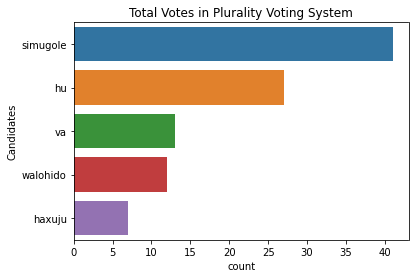

In [76]:
# plotting votes
plt.title("Total Votes in Plurality Voting System")
plt.xlabel("Count")
plt.ylabel("Candidates")
sns.countplot(y = votes, orient = 'h',  order = votes.value_counts().index);

### How does Ranked Choice Voting Work?
- Voters rank the candidates they want (all candidates or up to a max)
- Once all votes are in, a round or more of selection occurs:
    - The candidate with over 50% of votes, wins
    - If no candidate has over 50%:
        - The candidate with the lowest number of votes is eliminated
        - Voters with that candidate as their top vote have their vote count to the next valid candidate they ranked
- Rounds repeat until a winner is determined

We've actually already done most of the work needed to get going. The only difference is, now each voter will select their top # of candidates.

To simulate this as best as possible, let's also consider that each voter can vote for a max of 3 candidates, but some will vote for only 1 or 2.

Intead of a single list of single votes, we'll want a nested list, which represents each voters ranked votes. All the information we need is still in the `voter_cand_distances` variable from earlier

In [77]:
voter_cand_distances

array([[1.67679849, 0.49254297, 1.43667882, 1.4354533 , 1.39195565],
       [1.31909703, 0.27727845, 1.324184  , 1.08261599, 0.85163016],
       [1.05078504, 1.45552895, 0.44958129, 1.1030202 , 1.54541243],
       [1.37251366, 0.64731097, 1.13768342, 1.27970129, 1.02357325],
       [1.01122492, 1.4683181 , 0.40214206, 1.08657656, 1.51797714],
       [0.93674808, 1.21053084, 0.51772409, 0.81578299, 1.43203068],
       [1.44056352, 0.73399675, 1.15430224, 1.35965241, 1.12942575],
       [0.99796973, 1.02551993, 1.06183098, 0.49139244, 1.38867695],
       [0.87929937, 1.43189139, 0.27675804, 0.97179218, 1.42150867],
       [1.25739047, 1.89886438, 1.53424702, 1.61702439, 0.79391607],
       [1.56143409, 0.90979181, 1.20083783, 1.50550796, 1.30459146],
       [1.32038644, 0.27915754, 1.33686808, 1.07849404, 0.84867202],
       [1.10303422, 0.82644912, 1.04972587, 1.12754281, 0.56545906],
       [0.16796022, 1.4957749 , 0.77137517, 0.46043146, 1.00014908],
       [1.51385641, 1.05918332, 1.

We can use `numpy`s `argsort` to get the indexes that would sort a given array.

Let's look at the first voter.

In [78]:
first_voter = voter_cand_distances[0]
first_voter

array([1.67679849, 0.49254297, 1.43667882, 1.4354533 , 1.39195565])

In [79]:
np.argsort(first_voter)

array([1, 4, 3, 2, 0], dtype=int64)

In [80]:
first_voter_sorting_array = np.argsort(first_voter)
first_voter_sorting_array

array([1, 4, 3, 2, 0], dtype=int64)

### INTERPRETATION

If we index the `first_voter` using the `first_voter_sorting_array` as an index...we'll get the sorted array

In [81]:
first_voter[first_voter_sorting_array]

array([0.49254297, 1.39195565, 1.4354533 , 1.43667882, 1.67679849])

This `first_voter_sorting_array` is essentially the full candidate ranking for the voter.

Shown another way...

In [82]:
candidates.index[first_voter_sorting_array]

Index(['simugole', 'va', 'walohido', 'hu', 'haxuju'], dtype='object')

Let's randomly grab between 1 and 3 of the first elements in the `sorting_array` 

In [97]:
# random int from 1-3 with 10%, 30%, and 60% probabilities
np.random.choice([1,2,3],p=[.1, .3, .6])

1

In [108]:
all_first_ranked_votes = candidates.index[first_voter_sorting_array]

max_vote_index = np.random.choice([1,2,3],p=[.1, .3, .6])

first_ranked_votes = all_first_ranked_votes[:max_vote_index]
first_ranked_votes

Index(['simugole', 'va', 'walohido'], dtype='object')

Let's abstract this process into a single function `select_ranked_votes`

The `select_ranked_votes` function will take a single row of data as an argument
- It will ranke the candidates and return a limited list (length between 1-3)

In [111]:
def select_ranked_votes(row):
    sorting_array = np.argsort(row)
    all_ranked_votes = candidates.index[sorting_array]
    max_vote_index = np.random.choice([1,2,3],p=[.1, .3, .6])
    return all_ranked_votes[:max_vote_index]

In [117]:
select_ranked_votes(first_voter)

Index(['simugole', 'va', 'walohido'], dtype='object')

Let's apply the same logic for all voters


In [121]:
# NOTE: use of np.array.tolist()
ranked_choice_votes = [select_ranked_votes(row).tolist() for row in voter_cand_distances]
ranked_choice_votes[:10]

[['simugole', 'va'],
 ['simugole', 'va', 'walohido'],
 ['hu', 'haxuju', 'walohido'],
 ['simugole', 'va'],
 ['hu', 'haxuju'],
 ['hu', 'walohido', 'haxuju'],
 ['simugole', 'va'],
 ['walohido', 'haxuju', 'simugole'],
 ['hu', 'haxuju', 'walohido'],
 ['va', 'haxuju', 'hu']]

### Ranked Choice Voting Algorithm

Count votes from each voter's first choice.
- If there is a candidate with over 50% of the vote, that candidate wins!
- Otherwise, eliminate the candidate with the least votes, and voters with that removed candidate have their vote counted for the next valid ranked candidate
- Repeat until a winner is found

In [124]:
import math
from copy import deepcopy

def ranked_choice_vote(ranked_votes, verbose = False):
    ranked_votes = deepcopy(ranked_votes)
    eliminated = set()
    candidates = dict()
    result_history = []

    winning_count = math.ceil(len(ranked_votes) / 2)

    def winner_found():
        if len(candidates) == 1:
            return True
        return any([count > winning_count for count in candidates.values()])
    
    round_i = 0
    while not winner_found():
        # reset round
        round_i += 1
        if verbose:
            print(f'Starting Round {round_i} (Winning Count = {winning_count})')
        candidates = dict()

        # start round
        for ranked_vote in ranked_votes:
            while len(ranked_vote) and ranked_vote[0] in eliminated:
                ranked_vote.pop(0)

            if not len(ranked_vote):
                continue # eliminated all candidates from voter
            
            top_pick = ranked_vote[0]
            if top_pick not in candidates:
                candidates[top_pick] = 0
            candidates[top_pick] += 1
        if verbose:
            print("Candidate Counts:")
            print(candidates)

        result_history.append(candidates)
        # if winner not found
        if not winner_found():
            # eliminate last candidate
            last_candidate = None
            lowest_count = np.inf # arbitrarily large number
            for candidate, count in candidates.items():
                if count < lowest_count:
                    lowest_count = count
                    last_candidate = candidate
            eliminated.add(last_candidate)
            if verbose:
                print(f"Eliminated Candidate: {last_candidate}")
                print("==========================")
        
    # return winner
    top_candidate = None
    max_count = -np.inf # arbitrarily small number
    for candidate, count in candidates.items():
        if count > max_count:
            max_count = count
            top_candidate = candidate
    return top_candidate, result_history
    # DOES NOT ACCOUNT FOR ELIMINATION TIES - https://en.wikipedia.org/wiki/Instant-runoff_voting

In [126]:
output = ranked_choice_vote(ranked_choice_votes, verbose = True)
output

Starting Round 1 (Winning Count = 50)
Candidate Counts:
{'simugole': 41, 'hu': 27, 'walohido': 12, 'va': 13, 'haxuju': 7}
Eliminated Candidate: haxuju
Starting Round 2 (Winning Count = 50)
Candidate Counts:
{'simugole': 41, 'hu': 30, 'walohido': 13, 'va': 13}
Eliminated Candidate: walohido
Starting Round 3 (Winning Count = 50)
Candidate Counts:
{'simugole': 48, 'hu': 34, 'va': 13}
Eliminated Candidate: va
Starting Round 4 (Winning Count = 50)
Candidate Counts:
{'simugole': 56, 'hu': 37}


('simugole',
 [{'simugole': 41, 'hu': 27, 'walohido': 12, 'va': 13, 'haxuju': 7},
  {'simugole': 41, 'hu': 30, 'walohido': 13, 'va': 13},
  {'simugole': 48, 'hu': 34, 'va': 13},
  {'simugole': 56, 'hu': 37}])

## Visualizations

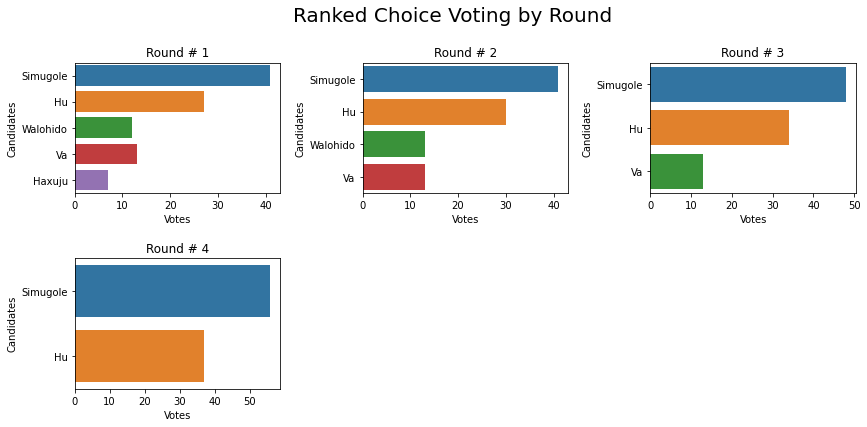

In [131]:
data_list = output[1]
fig, axes = plt.subplots(figsize = (14,6), nrows = math.ceil(len(data_list) / 3), ncols = 3)
plt.subplots_adjust(hspace = 0.5, wspace = 0.4)

# add title to entire figure
# NOTE: y is percentage of figure height for placement
fig.suptitle("Ranked Choice Voting by Round", fontsize = 20, y = 1.01)

axes = axes.flatten()
for i, data_dict in enumerate(data_list):
    ser_data = pd.Series(data_dict)
    ax = axes[i]
    ax.set_title(f'Round # {i + 1}')
    ax.set_ylabel('Candidates')
    ax.set_xlabel('Votes')
    sns.barplot(ax = ax, y = ser_data.index.map(str.capitalize), x = ser_data, orient='h')

# hide unused plots: if `i` is not fully used, we can ignore those axes
while i < len(axes) - 1:
    i += 1 # iterate i
    ax = axes[i] # accessing the subplot
    fig.delaxes(ax) # delete ax from figure
    

In [132]:
candidates

,love_of_cats_%,lower_taxes,income
haxuju,0.619774,0,137765
simugole,0.055576,1,57183
hu,0.907827,0,91733
walohido,0.226756,0,113542
va,0.499962,1,144378


In [134]:
voters.describe()

,love_of_cats_%,lower_taxes,income
count,100.000000,100.000000,100.000000
mean,0.536713,0.530000,68921.030000
std,0.298580,0.501614,43501.867868
min,0.013094,0.000000,11162.000000
25%,0.291426,0.000000,37225.500000
50%,0.582922,1.000000,56526.500000
75%,0.783032,1.000000,94681.000000
max,0.993182,1.000000,224322.000000


## Next Steps:
- Alter number of candidates
- Add more dimensions
- Use different distributions for dimensions (Poisson, Beta, Normal, etc.)
- Visualizations!